Project Introduction: LoanGuard – Credit Risk Prediction using Machine Learning

In today’s financial ecosystem, lending institutions face a critical challenge: accurately assessing credit risk while minimizing loan defaults. Poor risk assessment can lead to significant financial losses, whereas overly strict policies may reject genuine borrowers.
This project, LoanGuard – Credit Risk Prediction, addresses this challenge by leveraging machine learning techniques, specifically the Random Forest algorithm, to predict whether a borrower is likely to fully repay a loan.

 Importing necessary libraries for data manipulation and visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading the loan dataset from the CSV file

In [3]:
loanData=pd.read_csv('loan_data.csv')

Displaying the first few rows to check the data structure

In [16]:
loanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Visualizing the count of customers who meet the credit underwriting criteria vs. those who don't

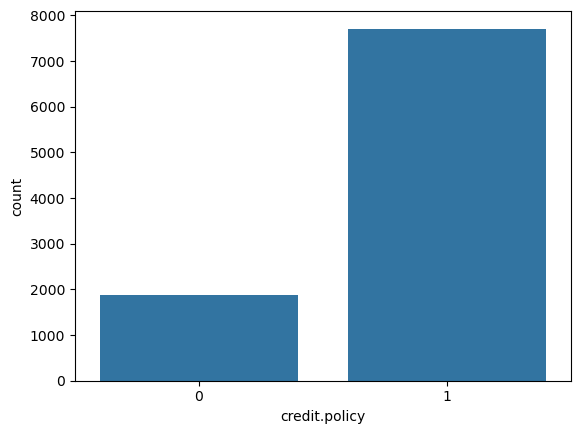

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [18]:
sns.barplot(loanData['credit.policy'].value_counts())
plt.show()
loanData['credit.policy'].value_counts()

checking the information of the data

In [4]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Generating summary statistics for the numerical columns

In [6]:
loanData.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loanData.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Plotting histograms of FICO scores, separated by credit policy status

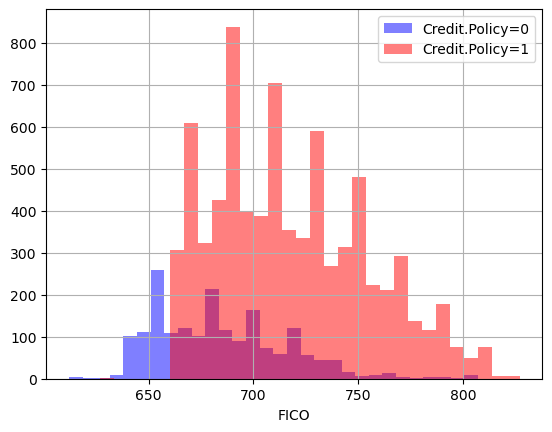

In [22]:
loanData[loanData['credit.policy']==0]['fico'].hist(alpha=0.5,bins=30,label='Credit.Policy=0',color='blue')
loanData[loanData['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30,label='Credit.Policy=1',color='red')
plt.legend()
plt.xlabel('FICO')
plt.show()

Plotting histograms of FICO scores, separated by whether the loan was fully paid or not

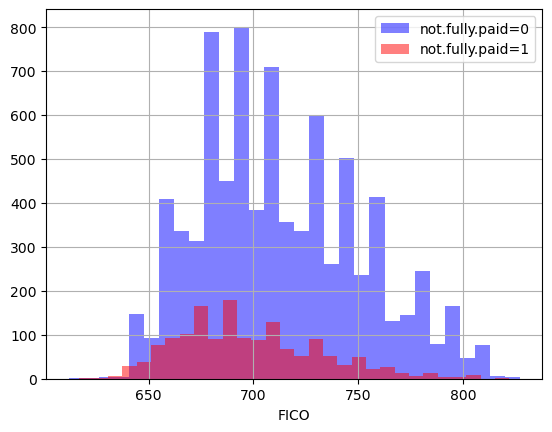

In [21]:
loanData[loanData['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=30,label='not.fully.paid=0',color='blue')
loanData[loanData['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=30,label='not.fully.paid=1',color='red')
plt.legend()
plt.xlabel('FICO')
plt.show()

Visualizing the relationship between loan purpose and repayment status

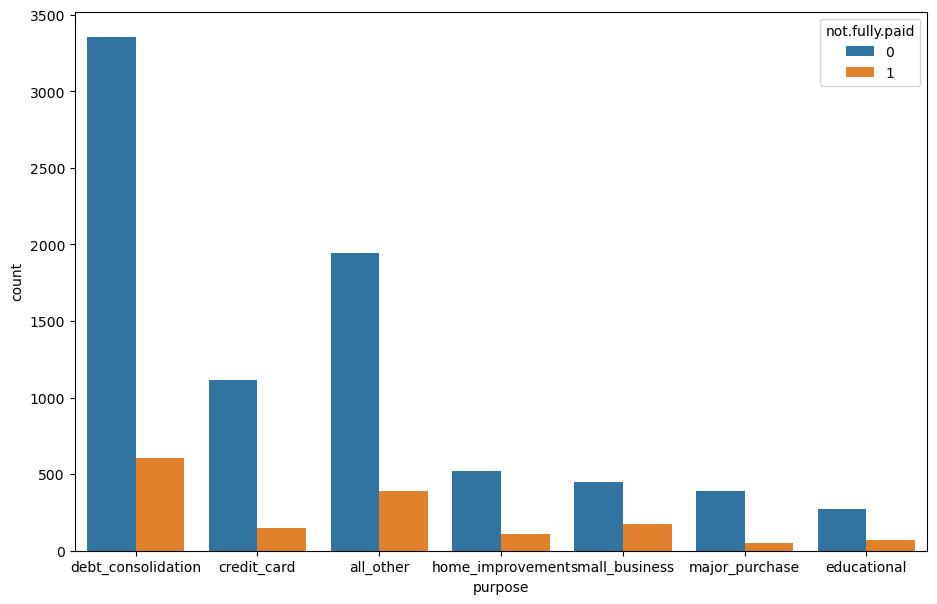

In [24]:
plt.figure(figsize=(11,7))
sns.countplot(data=loanData,x='purpose',hue='not.fully.paid')
plt.show()

Converting categorical features 'purpose' into dummy variables for the model

In [48]:
cat_feats=['purpose']

In [50]:
final_data=pd.get_dummies(data=loanData,columns=cat_feats,drop_first=True)

In [51]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [52]:
from sklearn.model_selection import train_test_split

Splitting the data into features (X) and target (y), and creating training/test sets

In [58]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [62]:
from sklearn.ensemble import RandomForestClassifier

Initializing and training the Random Forest Classifier

In [63]:
rfc=RandomForestClassifier()

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

Making predictions on the test set and printing evaluation metrics (confusion matrix and classification report)

In [67]:
predictions=rfc.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [71]:
print('confusion_matrix :-\n')
print(confusion_matrix(y_test,predictions))

confusion_matrix :-

[[2650   16]
 [ 481   14]]


In [72]:
print('classification_report :-\n')
print(classification_report(y_test,predictions))

classification_report :-

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2666
           1       0.47      0.03      0.05       495

    accuracy                           0.84      3161
   macro avg       0.66      0.51      0.48      3161
weighted avg       0.79      0.84      0.78      3161

